<a href="https://colab.research.google.com/github/GopishKrishna/CaloriesBurntPredictionSystem/blob/main/Calories_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [88]:
#loading the dataset
calories_data = pd.read_csv('/content/calories.csv')
calories_data.shape

(15000, 9)

In [89]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [90]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [91]:
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [92]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [93]:
sns.set()

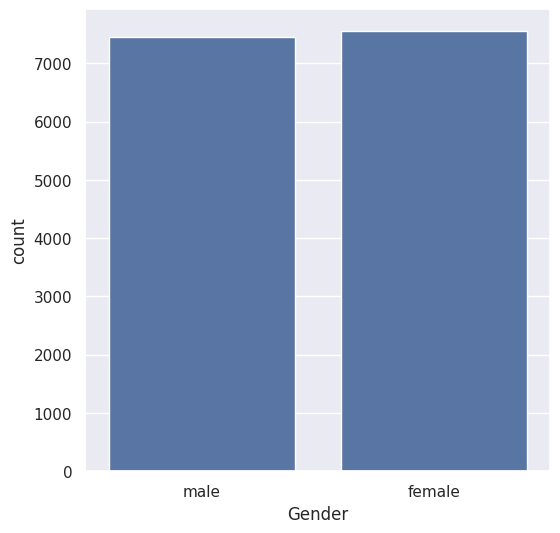

In [94]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=calories_data)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

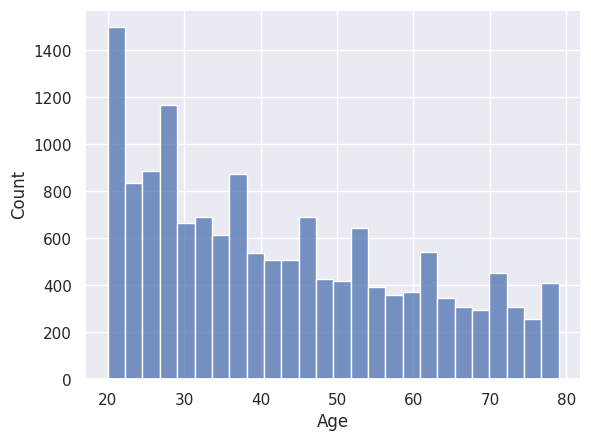

In [95]:
sns.histplot(calories_data['Age'])

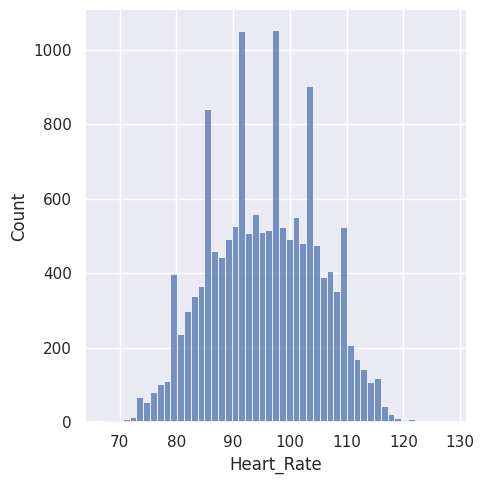

In [96]:
sns.displot(calories_data['Heart_Rate'])

In [97]:
calories_data.replace({'Gender':{'male':1,'female':0}},inplace=True)

/tmp/ipython-input-2564044333.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender':{'male':1,'female':0}},inplace=True)


Correlation

In [98]:
correlation = calories_data.corr()

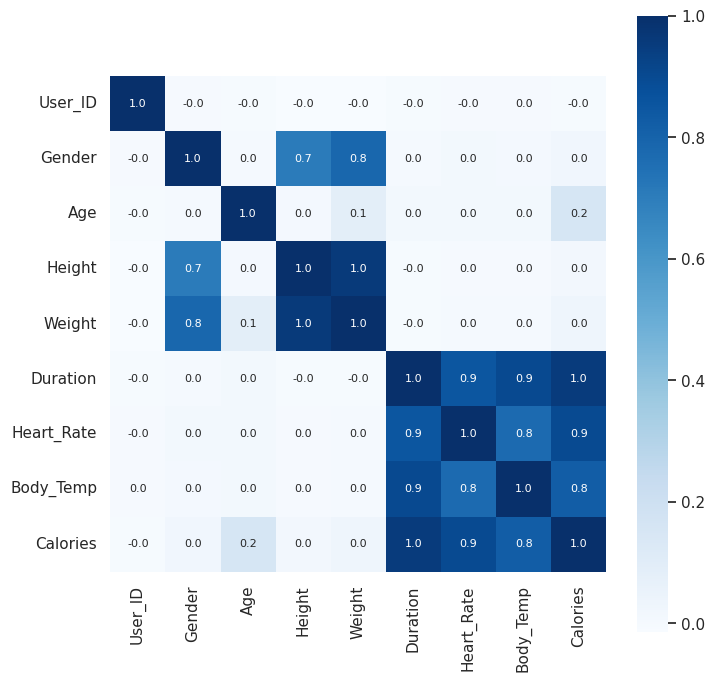

In [99]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size': 8},cmap='Blues')
plt.show()

splitting the data

In [100]:
X = calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y = calories_data['Calories']

In [101]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

In [102]:
model = XGBRegressor()

In [103]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Model Evaluation

In [104]:
train_predict = model.predict(X_train)
# mean absolute error
mae = metrics.mean_absolute_error(Y_train,train_predict)
print("Mean absolute error on train_data",mae)

Mean absolute error on train_data 0.9322033420062313


In [105]:
test_predict = model.predict(X_test)
# mean absolute error
mae = metrics.mean_absolute_error(Y_test,test_predict)
print("Mean absolute error on train_data",mae)

Mean absolute error on train_data 1.4833678883314132


In [106]:
input_data = (1,48,182.0,85.0,1.0,80.0,37.7)
input_data_arr = np.asarray(input_data).reshape(1,-1)
predction = model.predict(input_data_arr)
print(predction)

[2.7608383]


In [107]:
pickle.dump(model,open('regressor_model.pkl','wb'))
loaded_model = pickle.load(open('regressor_model.pkl','rb'))